In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/Users/mohitankoliya/Desktop/'):
    for filename in filenames:
        (os.path.join(dirname, filename))

In [5]:
labels = os.listdir('/Users/mohitankoliya/Desktop/natural-images/natural_images')
print(labels)

['cat', 'car', 'fruit', 'dog', 'person', 'flower', 'motorbike', 'airplane']



 CAT


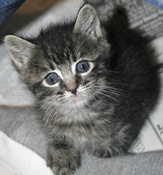

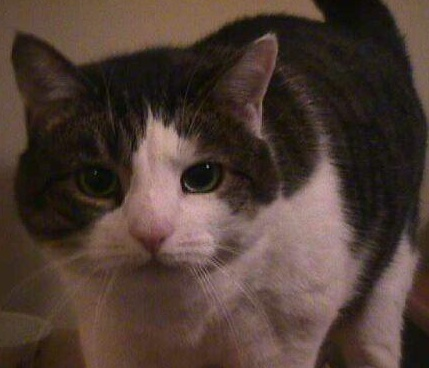

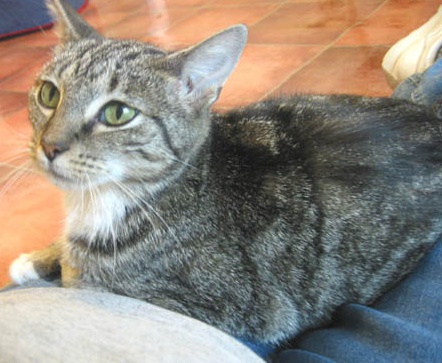

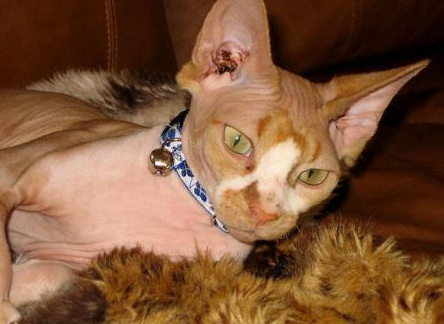

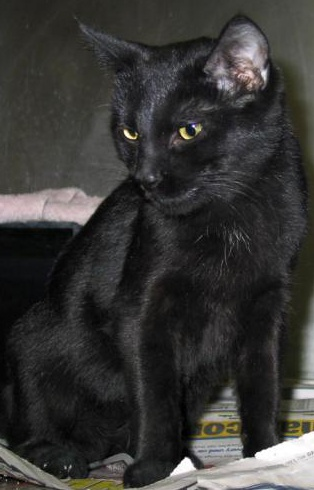

there are  885  images in  cat class

 CAR


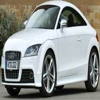

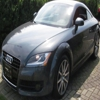

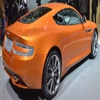

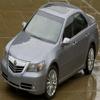

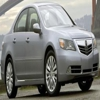

there are  968  images in  car class

 FRUIT


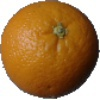

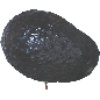

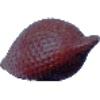

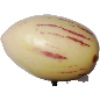

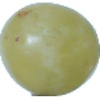

there are  1000  images in  fruit class

 DOG


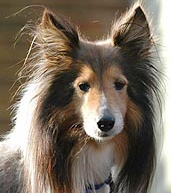

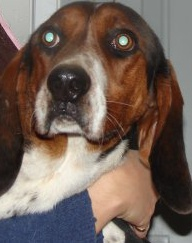

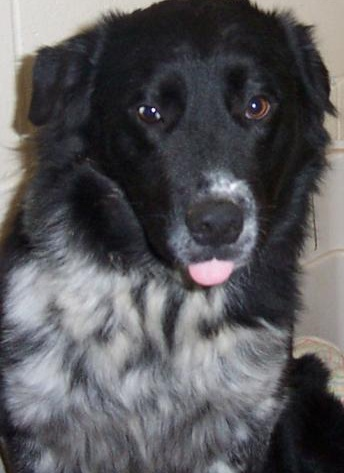

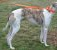

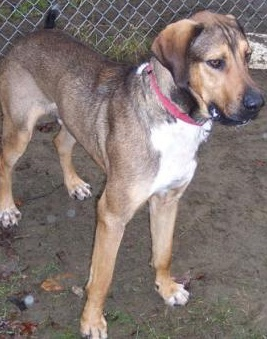

there are  702  images in  dog class

 PERSON


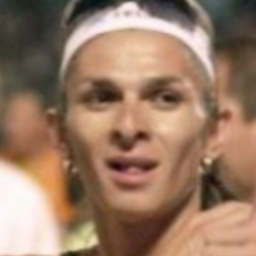

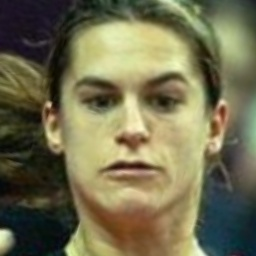

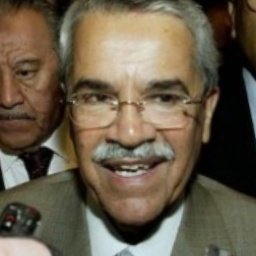

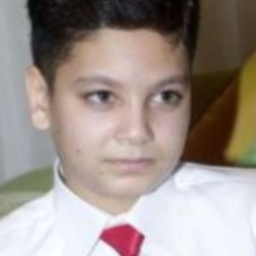

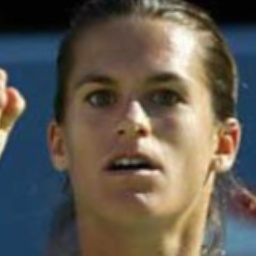

there are  986  images in  person class

 FLOWER


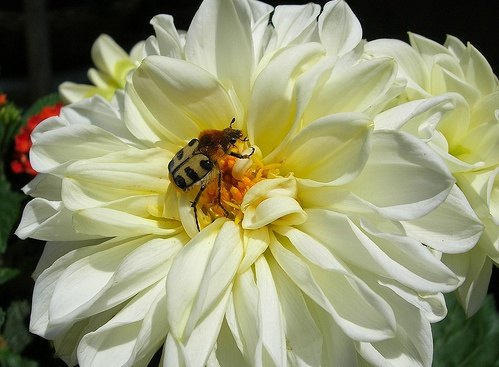

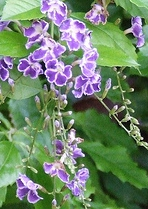

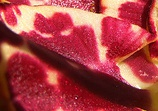

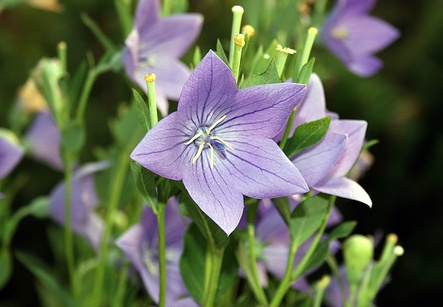

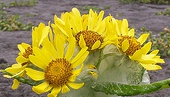

there are  843  images in  flower class

 MOTORBIKE


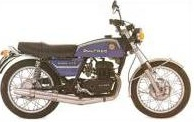

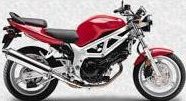

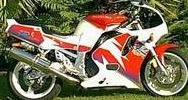

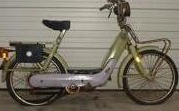

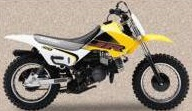

there are  788  images in  motorbike class

 AIRPLANE


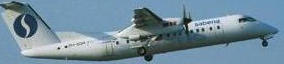

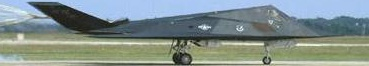

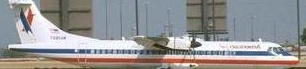

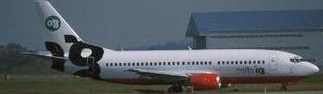

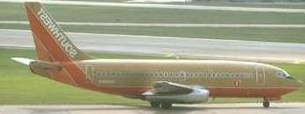

there are  727  images in  airplane class


In [6]:
from IPython.display import Image, display
num = []
for label in labels:
    path = '/Users/mohitankoliya/Desktop/natural-images/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    k = 0
    print('\n', label.upper())
    for image_path in folder_data:
        if k < 5:
            display(Image(path+image_path))
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', label, 'class')

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
plt.bar(labels, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.ylabel('count')
plt.show()

<Figure size 800x800 with 1 Axes>

In [8]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path = '/Users/mohitankoliya/Desktop/natural-images/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (32,32))
        x_data.append(np.array(image_resized))
        y_data.append(label)

In [9]:
x_data = np.array(x_data)
y_data = np.array(y_data)
print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)

the shape of X is:  (6899, 32, 32, 3) and that of Y is:  (6899,)


In [10]:
#stadardizing the input data
x_data = x_data.astype('float32')/255

In [11]:
#converting the y_data into categorical:
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(y_data)
from keras.utils import to_categorical
y_categorical = to_categorical(y_encoded)

Using TensorFlow backend.
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [12]:
#lets shuffle all the data we have:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

In [14]:
#structuring the CNN model
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

W0503 09:23:45.606094 4675909056 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0503 09:23:45.647577 4675909056 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0503 09:23:45.665146 4675909056 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0503 09:23:45.701881 4675909056 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0503 09:23:45.724926 4675909056 deprecation_wrapper.py:119] From /anaconda

In [15]:
#let's compile the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

W0503 09:23:45.959086 4675909056 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0503 09:23:45.996273 4675909056 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [16]:
#fitting the model
history = model.fit(X_train, Y_train, epochs=25, validation_split=0.2)

W0503 09:23:46.133269 4675909056 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3697 samples, validate on 925 samples
Epoch 1/25
3697/3697 [==============================] - 6s 2ms/step - loss: 1.2625 - acc: 0.5434 - val_loss: 0.7778 - val_acc: 0.7503
Epoch 2/25
3697/3697 [==============================] - 5s 1ms/step - loss: 0.6685 - acc: 0.7617 - val_loss: 0.5338 - val_acc: 0.7892
Epoch 3/25
3697/3697 [==============================] - 5s 1ms/step - loss: 0.5355 - acc: 0.8101 - val_loss: 0.4347 - val_acc: 0.8465
Epoch 4/25
3697/3697 [==============================] - 6s 1ms/step - loss: 0.4091 - acc: 0.8493 - val_loss: 0.4203 - val_acc: 0.8454
Epoch 5/25
3697/3697 [==============================] - 5s 1ms/step - loss: 0.3699 - acc: 0.8580 - val_loss: 0.3429 - val_acc: 0.8703
Epoch 6/25
3697/3697 [==============================] - 5s 1ms/step - loss: 0.3146 - acc: 0.8848 - val_loss: 0.3363 - val_acc: 0.8778
Epoch 7/25
3697/3697 [==============================] - 5s 1ms/step - loss: 0.2737 - acc: 0.8902 - val_loss: 0.3078 - val_acc: 0.8897
Epoch 8/25
3697

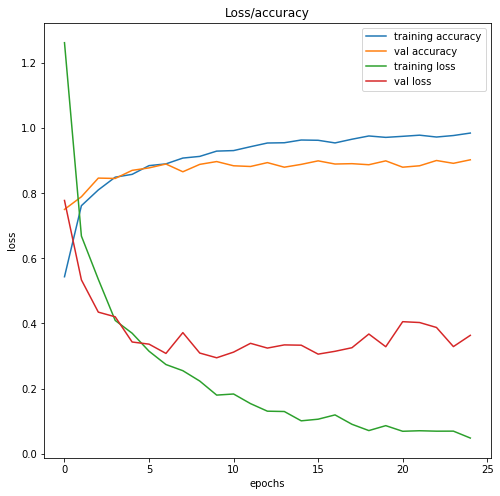

In [17]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
Y_pred = model.predict_classes(X_test)
Y_test = np.argmax(Y_test, axis = 1)
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       236
           1       0.96      0.95      0.95       342
           2       0.80      0.74      0.76       302
           3       0.67      0.68      0.67       221
           4       0.86      0.95      0.90       262
           5       0.99      1.00      0.99       330
           6       0.97      0.98      0.97       257
           7       0.99      0.98      0.99       327

    accuracy                           0.91      2277
   macro avg       0.90      0.90      0.90      2277
weighted avg       0.91      0.91      0.91      2277

